In [1]:
import sys
sys.path.append(r"C:\Users\user\labcode\hp4155")

import module
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output


# In this measurement SMU2 and SMU4 are used which are closer to the user
#smu4 is the voltage source and smu2 is ground
#how to use current complnance??

#parameters set by the user
Vset=1
CC_vset=10**(-3)
Vreset=-1
CC_vreset=10**(-3)
step = 0.02
voltage=[]
current=[]
abs_current=[]
abs_voltage=[]

#connect to the device
device = module.HP4155a('GPIB0::17::INSTR')
device.reset()


#setup device
#smu1 and smu3 are disabled
device.smu_disable_sweep(1)
device.smu_disable_sweep(3)

#disable vmus and vsus
device.disable_vsu(1)
device.disable_vsu(2)
device.disable_vmu(1)
device.disable_vmu(2)


#smu2 is constant and common
device.smu_mode_meas(2,'COMM')
device.smu_function_sweep(2,'CONS')

#smu4 is VAR1 and V
device.smu_mode_meas(4,'V')
device.smu_function_sweep(4,'VAR1')

device.integration_time('MED')

#user functions
device.user_function('ABSV','V','ABS(V4)')
device.user_function('ABSI','A','ABS(I4)')

#display variables
device.display_variable('X','V4')
device.display_variable('Y1','I4')

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
51
[3.1e-13, 3.7e-13, -4e-13, -4.9e-13, 5e-14, -4.6e-13, 3e-13, 2.5e-13, 3.2e-13, 4.7e-13, 1.7e-13, -2.6e-13, 2e-14, 6e-14, 2e-13, 2.2e-13, 6e-13, -2.1e-13, 2e-13, 1.5e-13, 2.9e-13, 9e-14, 5e-14, 4e-13, -2.1e-13, 1.1e-13, 6.3e-13, 1e-14, 2.6e-13, 2.3e-13, -3.5e-13, 1.3e-13, 1.3e-13, 2.53e-12, -8.4e-13, -1.02e-11, -1.284e-11, -1.333e-11, -9.35e-12, -3.58e-12, 3.25e-12, 2.79e-12, 8.5e-13, 1.41e-12, 1.42e-12, 1.18e-12, 9.8e-13, 9e-13, 9.7e-13, 1.16e-12, 6.1e-13]
51
[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8,

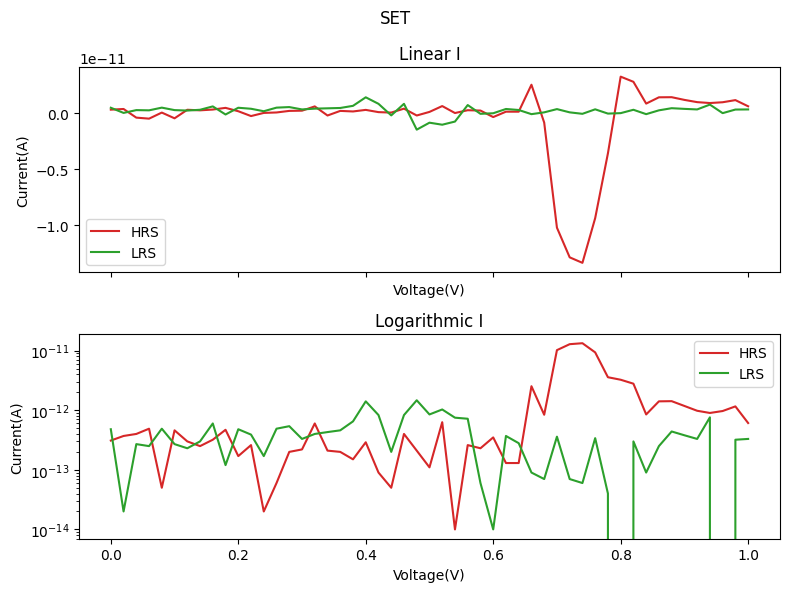

<Figure size 640x480 with 0 Axes>

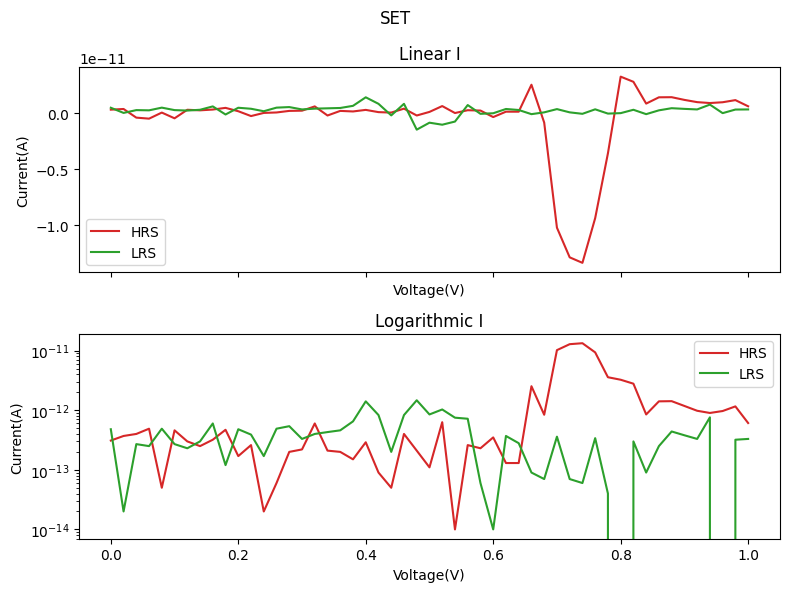

In [2]:
#set measurement
#define start-step-stop and current compliance
device.start_value_sweep(0)
device.step_sweep(step)
device.stop_value_sweep(Vset)
device.comp('VAR1',CC_vset)

#start measurement (step 1)
device.single_measurement()
while device.operation_completed()==False:
    pass

device.autoscaling()

V=device.return_data('V4')
I=device.return_data('I4')
ABSV=device.return_data('ABSV')
ABSI=device.return_data('ABSI')

#test
print(V)
print(len(V))
print(I)
print(len(I))
print(ABSV)
print(len(ABSV))
print(ABSI)
print(len(ABSI))

voltage.append(V)
current.append(I)
abs_current.append(ABSI)
abs_voltage.append(ABSV)

#step 2 from vset to 0
device.start_value_sweep(Vset)
device.step_sweep(step)
device.stop_value_sweep(0)
device.comp('VAR1',CC_vset)

#start measurement (step 1)
device.single_measurement()
while device.operation_completed()==False:
    pass

device.autoscaling()

V=device.return_data('V4')
I=device.return_data('I4')
ABSV=device.return_data('ABSV')
ABSI=device.return_data('ABSI')

#test
print(V)
print(len(V))
print(I)
print(len(I))
print(ABSV)
print(len(ABSV))
print(ABSI)
print(len(ABSI))

voltage.append(V)
current.append(I)
abs_current.append(ABSI)
abs_voltage.append(ABSV)

#plot results
plt.figure().clear()
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6)) #the plots share the same x axis 
fig.suptitle('SET')
ax1.set_title('Linear I')
ax1.set(xlabel='Voltage(V)',ylabel='Current(A)')
ax2.set_title('Logarithmic I')
ax2.set(xlabel='Voltage(V)',ylabel='Current(A)')
ax2.set_yscale('log')

ax1.plot(voltage[0],current[0],color='tab:red',label='HRS')
ax1.plot(voltage[1],current[1],color='tab:green',label='LRS')
ax2.plot(voltage[0],abs_current[0],color='tab:red',label='HRS')
ax2.plot(voltage[1],abs_current[1],color='tab:green',label='LRS')

ax1.legend(loc='best')
ax2.legend(loc="best")
fig.tight_layout()
display(fig)

[0.0, -0.02, -0.04, -0.06, -0.08, -0.1, -0.12, -0.14, -0.16, -0.18, -0.2, -0.22, -0.24, -0.26, -0.28, -0.3, -0.32, -0.34, -0.36, -0.38, -0.4, -0.42, -0.44, -0.46, -0.48, -0.5, -0.52, -0.54, -0.56, -0.58, -0.6, -0.62, -0.64, -0.66, -0.68, -0.7, -0.72, -0.74, -0.76, -0.78, -0.8, -0.82, -0.84, -0.86, -0.88, -0.9, -0.92, -0.94, -0.96, -0.98, -1.0]
51
[-4e-14, 9e-14, 1.6e-13, 1.2e-13, 2.6e-13, 5e-14, -6e-14, 1.9e-13, -1.6e-13, 3e-13, 2e-14, 3e-14, 2.9e-13, -1e-13, 3.5e-13, -3e-14, 1e-14, 1.8e-13, 1.2e-13, 1.1e-13, 1.1e-13, 7e-14, 3e-14, 2e-14, 3.2e-13, -1.1e-13, 2.7e-13, 1.4e-13, -1e-14, 1.3e-13, 1.1e-13, 1.5e-13, 1.2e-13, 1.9e-13, 4e-14, 9e-14, 1e-13, -1.7e-13, 3e-14, 1.3e-13, 4.5e-13, -3.4e-13, 1.73e-12, 3.32e-12, 3.06e-12, 3.41e-12, 3.45e-12, 3.52e-12, 3.33e-12, 2.04e-12, 1.14e-12]
51
[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.

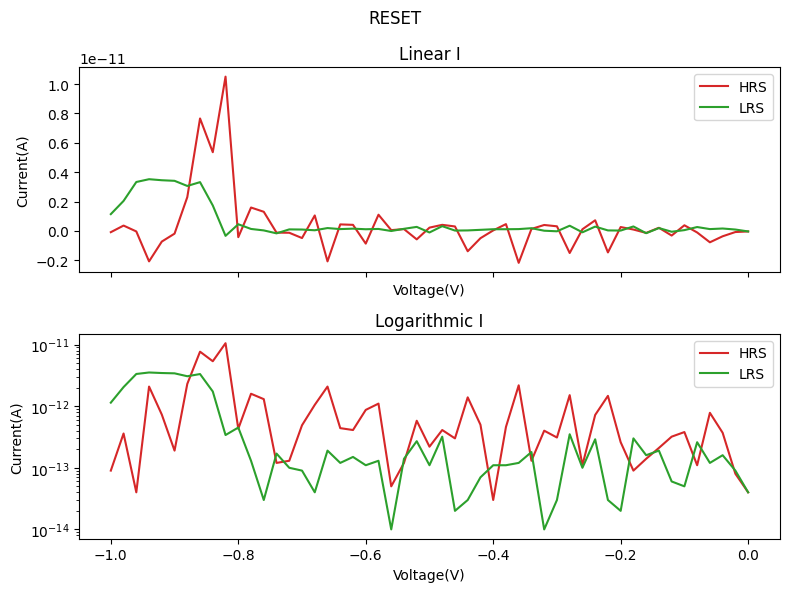

<Figure size 640x480 with 0 Axes>

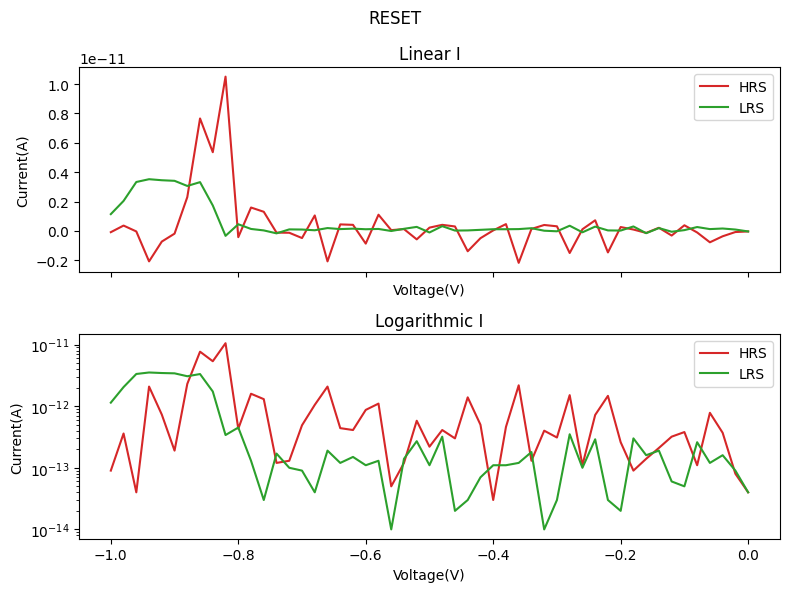

In [3]:
#step 3 from 0 to vreset
#define start-step-stop and current compliance
device.start_value_sweep(0)
device.step_sweep(step)
device.stop_value_sweep(Vreset)
device.comp('VAR1',CC_vreset)

#start measurement (step 1)
device.single_measurement()
while device.operation_completed()==False:
    pass

device.autoscaling()

V=device.return_data('V4')
I=device.return_data('I4')
ABSV=device.return_data('ABSV')
ABSI=device.return_data('ABSI')

#test
print(V)
print(len(V))
print(I)
print(len(I))
print(ABSV)
print(len(ABSV))
print(ABSI)
print(len(ABSI))

voltage.append(V)
current.append(I)
abs_current.append(ABSI)
abs_voltage.append(ABSV)

#step 4 from vreset to 0
device.start_value_sweep(Vreset)
device.step_sweep(step)
device.stop_value_sweep(0)
device.comp('VAR1',CC_vreset)

device.single_measurement()
while device.operation_completed()==False:
    pass

device.autoscaling()

V=device.return_data('V4')
I=device.return_data('I4')
ABSV=device.return_data('ABSV')
ABSI=device.return_data('ABSI')

#test
print(V)
print(len(V))
print(I)
print(len(I))
print(ABSV)
print(len(ABSV))
print(ABSI)
print(len(ABSI))

voltage.append(V)
current.append(I)
abs_current.append(ABSI)
abs_voltage.append(ABSV)

#plot results
plt.figure().clear()
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6)) #the plots share the same x axis 
fig.suptitle('RESET')
ax1.set_title('Linear I')
ax1.set(xlabel='Voltage(V)',ylabel='Current(A)')
ax2.set_title('Logarithmic I')
ax2.set(xlabel='Voltage(V)',ylabel='Current(A)')
ax2.set_yscale('log')

ax1.plot(voltage[3],current[3],color='tab:red',label='HRS')
ax1.plot(voltage[2],current[2],color='tab:green',label='LRS')
ax2.plot(voltage[3],abs_current[3],color='tab:red',label='HRS')
ax2.plot(voltage[2],abs_current[2],color='tab:green',label='LRS')

ax1.legend(loc='best')
ax2.legend(loc="best")
fig.tight_layout()
display(fig)

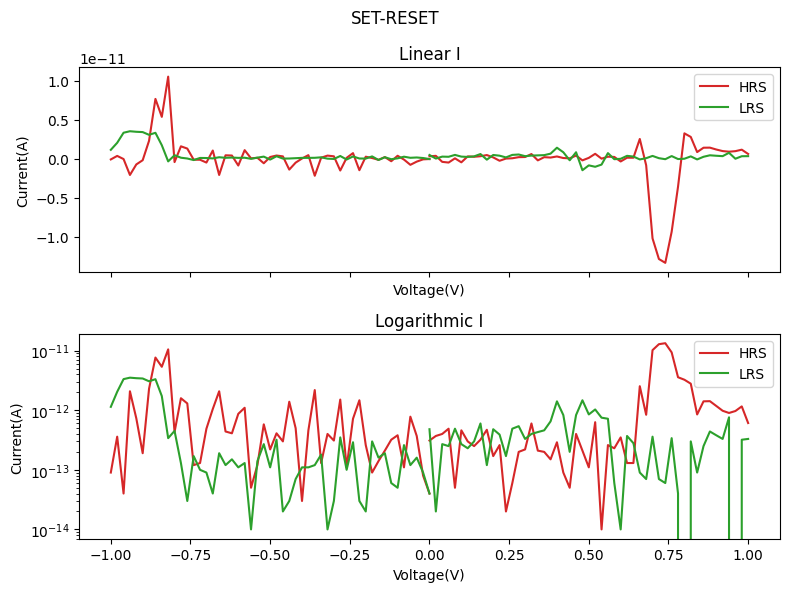

<Figure size 640x480 with 0 Axes>

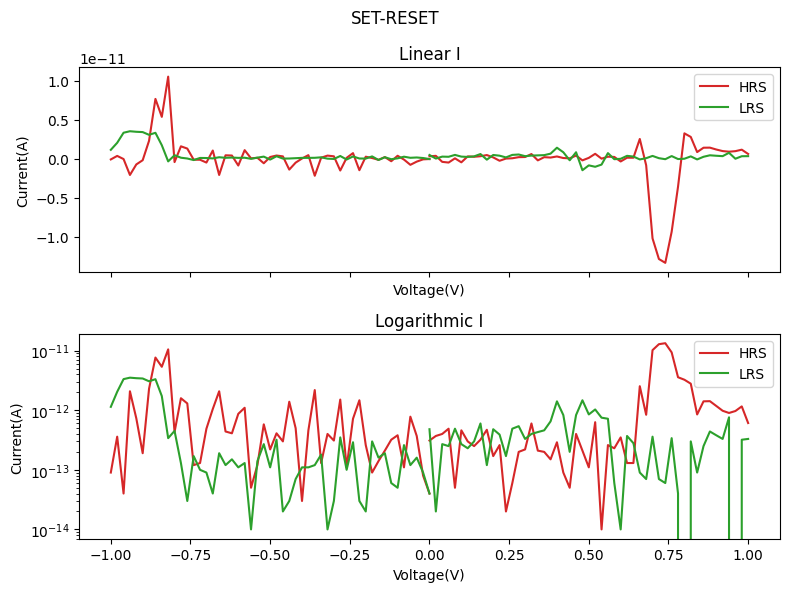

In [4]:
#plot all results

plt.figure().clear()
fig, (ax1, ax2) = plt.subplots(2,sharex=True,figsize=(8,6)) #the plots share the same x axis 
fig.suptitle('SET-RESET')
ax1.set_title('Linear I')
ax1.set(xlabel='Voltage(V)',ylabel='Current(A)')
ax2.set_title('Logarithmic I')
ax2.set(xlabel='Voltage(V)',ylabel='Current(A)')
ax2.set_yscale('log')

ax1.plot(voltage[3],current[3],color='tab:red')
ax1.plot(voltage[2],current[2],color='tab:green')
ax2.plot(voltage[3],abs_current[3],color='tab:red')
ax2.plot(voltage[2],abs_current[2],color='tab:green')
ax1.plot(voltage[0],current[0],color='tab:red',label='HRS')
ax1.plot(voltage[1],current[1],color='tab:green',label='LRS')
ax2.plot(voltage[0],abs_current[0],color='tab:red',label='HRS')
ax2.plot(voltage[1],abs_current[1],color='tab:green',label='LRS')

ax1.legend(loc='best')
ax2.legend(loc="best")
fig.tight_layout()
display(fig)

In [5]:
print(device.error())

+0,"No error"

